## Traditional ML classification models under wavelet analysis structures

In [1]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pandas as pd
import sklearn
import scipy 
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

### Implementations
#### Configurations

In [2]:
# Configurations - Feature names
LOWLUX = 'lowlux'
MIDLUX = 'middlelux'
HIGHLUX = 'highlux'
NOBACK = 'nothing'
ONEBACK = 'ONEBACK'
TWOBACK = 'TWOBACK'
THREEBACK = 'THREEBACK'
FILENAME = 'Filename'
IPA2 = 'IPA 2'
INDEX = 'index'
LUX = 'Luminance'
LABELS = 'Labels'
ISBLINK_LEFT = 'isBlink-Left'
ISBLINK_RIGHT = 'isBlink-Right'
PID = 'PID'
AVE_DM = 'Averaged Diameter'
DIFF_DM = 'Difference Diameter'

IPA_LEFT = 'IPA Left'
IPA_RIGHT = 'IPA Right'

LHIPA_LEFT = 'LHIPA Left'
LHIPA_RIGHT = 'LHIPA Right'

MEAN_LEFT = 'Mean Left'
MEAN_RIGHT = 'Mean Right'

STD_LEFT = 'STD Left'
STD_RIGHT = 'STD Right'

SKEW_LEFT = 'Skew Left'
SKEW_RIGHT = 'Skew Right'

MAX_LEFT = 'MAX Left'
MAX_RIGHT = 'MAX Right'

MED_LEFT = 'Med Left'
MED_RIGHT = 'Med Right'

VAR_LEFT = 'Var Left'
VAR_RIGHT = 'Var Right'


# Model names.
KNN = 'KNN'
SVM = 'SVM'
RF = 'Random Forest'

# Training and testing ratio.
TEST_SIZE_PCT = 0.1

# Hyper-parameters tuning.
# Setting thresholds for 2 eyes' blinking rates.
THRES_BLINKING_RATE = 1.00 # The default value.
# The random forest layers.
RF_DEPTH = 10

#### Read data

In [3]:
# Read data and make them into processable formalities.
# filepath = '../Data/Results/21-11-13-13/results.csv' # Without ipa and lhipa features.
# filepath = '../Data/Results/22-11-22-23/results.csv' # With ipa and lhipa features. Sliding window: 5:3.
# filepath = '../Data/Results/23-11-09-08/results.csv' # With ipa and lhipa features. Sliding window: 5:4.
# filepath = '../Data/Results/23-11-09-51/results.csv' # With ipa and lhipa features. Sliding window: 2:1.6
# filepath = '../Data/Results/23-11-12-48/results.csv' # With ipa and lhipa features. Sliding window: 8-7
# filepath = '../Data/Results/23-11-14-06/results.csv' # With ipa and lhipa features. Sliding window: 10-8 
# filepath = '../Data/Results/23-11-14-24/results.csv' # With ipa and lhipa features. Sliding window: 10-9.5 --> # The longer the window, the more data, the better.
# filepath = '../Data/Results/23-11-15-59/results.csv' # Inclueded the PD statistical features. The best. Sliding window: 5-4.5 --> 0.98 --> Without lux, blinking rates, the pure time baseline and baseline + IPA, LHIPA would be still be great: 0.94; 0.96
# filepath = '../Data/Results/23-11-16-17/results.csv'# Inclueded the PD statistical features. Sliding window: 10-9.5 --> 0.988;0.989
# filepath = '../Data/Results/23-11-16-24/results.csv'# Inclueded the PD statistical features. Sliding window: 4-3.5 --> 0.92;0.88
# filepath = '../Data/Results/23-11-16-55/results.csv'# Inclueded the PD statistical features. Sliding window: 4-3 --> 0.96;0.96
# filepath = '../Data/Results/23-11-16-36/results.csv'# Inclueded the PD statistical features. Sliding window: 5-4 --> 0.94;0.95
# filepath = '../Data/Results/23-11-16-43/results.csv'# Inclueded the PD statistical features. Sliding window: 5-2.5 --> 0.88;0.89

filepath = '../Data/Results/23-11-18-07/results.csv'# Inclueded the PD statistical features. All participants, include RZ(04) and ZL (05). Sliding window: 4-3 -->

####################################
# Outside Testing Dataset from Participants Lin (P05) and Runze (P04) 
filepath_test = '../Data/Results/23-11-17-11/results.csv'# Inclueded the PD statistical features. Sliding window: 4-3 --> 

df_raw_features = pd.read_csv(filepath)
df_raw_test = pd.read_csv(filepath_test)

In [4]:
df_raw_features

,Left-0,Left-1,Left-2,Left-3,Left-4,Left-5,Left-6,Left-7,Left-8,Left-9,...,Skew Right,Med Left,Med Right,Var Left,Var Right,isBlink-Left,isBlink-Right,Luminance,PID,Labels
0,90.753592,90.025702,89.412000,90.495202,90.423115,90.336647,90.534628,90.501261,90.304912,90.299277,...,0.199771,44.826304,47.690409,0.126128,0.190087,0.406250,0.462500,lowlux,7,nothing
1,89.899688,89.952707,89.961924,90.418765,90.078198,89.968372,89.973377,89.938209,89.923748,89.902937,...,0.574672,44.626577,47.560834,0.107619,0.111290,0.406250,0.462500,lowlux,7,nothing
2,90.620436,90.862172,90.518094,90.522255,90.375727,90.282780,90.175811,90.071454,89.966849,89.862239,...,0.013638,44.587459,47.507254,0.101391,0.070478,0.210417,0.254167,lowlux,7,nothing
3,88.918938,88.836070,88.882565,89.378604,89.976288,88.220448,88.525137,88.899432,89.399148,89.814582,...,-0.137056,44.591570,47.601435,0.084413,0.101510,0.000000,0.004167,lowlux,7,nothing
4,89.384202,88.374568,88.943260,89.100408,88.632879,89.213377,88.886819,88.681710,89.061931,88.684184,...,-0.052907,44.645752,47.808524,0.085784,0.101381,0.000000,0.000000,lowlux,7,nothing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8797,30.486825,28.155829,28.579285,27.703681,27.780757,27.696367,27.686003,27.336145,27.092800,26.736913,...,1.181830,13.640590,15.968305,0.732186,0.859839,0.060417,0.056250,highlux,5,THREEBACK
8798,26.912861,26.145606,26.350397,26.183503,25.995392,26.151768,26.275171,26.182730,26.221793,26.177218,...,1.598787,14.382211,16.843356,6.172339,14.072366,0.195833,0.179167,highlux,5,THREEBACK
8799,27.471614,26.947570,26.979890,26.720927,27.014718,27.214927,27.151763,27.568128,27.274068,27.538618,...,1.674098,14.392561,16.843356,5.472404,13.309212,0.195833,0.179167,highlux,5,THREEBACK
8800,28.760078,29.832626,28.676963,29.418880,28.426354,28.938910,28.966268,28.478776,28.597267,28.767412,...,1.684629,14.266420,16.489675,5.596791,13.526271,0.195833,0.179167,highlux,5,THREEBACK


In [5]:
df_raw_test

,Left-0,Left-1,Left-2,Left-3,Left-4,Left-5,Left-6,Left-7,Left-8,Left-9,...,Skew Right,Med Left,Med Right,Var Left,Var Right,isBlink-Left,isBlink-Right,Luminance,PID,Labels
0,28.429978,30.484167,29.951020,30.250568,30.159186,30.185142,30.180271,30.180830,30.180799,30.180864,...,1.182907,14.398180,13.861731,5.585895,1.841995,0.343750,0.306250,highlux,4,nothing
1,27.682180,23.316915,23.580938,23.538815,27.771465,29.755519,29.886664,31.352523,34.354869,38.102366,...,1.791816,14.668909,13.821024,6.161731,5.743477,0.379167,0.314583,highlux,4,nothing
2,28.972425,30.762878,30.876705,34.227617,32.592168,32.347586,36.383206,36.368578,24.689655,27.673218,...,0.602607,15.411967,14.691131,5.417487,7.613258,0.629167,0.562500,highlux,4,nothing
3,36.809723,33.273702,36.015712,34.286032,29.961437,24.964216,26.226058,25.551018,25.752671,25.689237,...,-0.146899,15.411459,18.185384,8.456218,10.801195,0.708333,0.681250,highlux,4,nothing
4,29.040681,25.017926,26.063858,25.444760,25.648491,25.318030,27.185224,29.308302,29.786273,28.797867,...,-0.329720,16.735501,19.140194,7.058080,12.597142,0.687500,0.612500,highlux,4,nothing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3151,30.486825,28.155829,28.579285,27.703681,27.780757,27.696367,27.686003,27.336145,27.092800,26.736913,...,1.181830,13.640590,15.968305,0.732186,0.859839,0.060417,0.056250,highlux,5,THREEBACK
3152,26.912861,26.145606,26.350397,26.183503,25.995392,26.151768,26.275171,26.182730,26.221793,26.177218,...,1.598787,14.382211,16.843356,6.172339,14.072366,0.195833,0.179167,highlux,5,THREEBACK
3153,27.471614,26.947570,26.979890,26.720927,27.014718,27.214927,27.151763,27.568128,27.274068,27.538618,...,1.674098,14.392561,16.843356,5.472404,13.309212,0.195833,0.179167,highlux,5,THREEBACK
3154,28.760078,29.832626,28.676963,29.418880,28.426354,28.938910,28.966268,28.478776,28.597267,28.767412,...,1.684629,14.266420,16.489675,5.596791,13.526271,0.195833,0.179167,highlux,5,THREEBACK


#### Encoder

This part encodes features into numeric values.

In [6]:
# Encoding Lux and Labeling
def encode(df_input):
    luxes = []
    nbacks = []
#     df_numeric_features = df_raw_features.copy()
    df_numeric_features = df_input.copy()

    for index, row in df_numeric_features.iterrows():
        # Label luxes
        if LOWLUX in row[LUX]:
            luxes.append(1)
        elif MIDLUX in row[LUX]:
            luxes.append(2)
        elif HIGHLUX in row[LUX]:
            luxes.append(3)

        # Label task difficulties
        if NOBACK in row[LABELS]:
            nbacks.append(0)
        elif ONEBACK in row[LABELS]:
            nbacks.append(1)
        elif TWOBACK in row[LABELS]:
            nbacks.append(2)
        elif THREEBACK in row[LABELS]:
            nbacks.append(3)

    df_numeric_features[LUX] = luxes
    df_numeric_features[LABELS] = nbacks
    
    # Output the results
    df_output = df_numeric_features.copy()
    return df_output

#### Data visualization

In [7]:
# sns.pairplot(df_labels_IPA2, hue=LABELS)

#### Auxiliary functions

In [8]:
# Show machine learning models' performance.
def show_performance(y_true, y_pred, model_name):
    # Get the accuracy score.
    acc_score = accuracy_score(y_true, y_pred)
    
    # Get the F1 score.
    # I chose the macro for worrying about the imbanlance of labels. In my case, since I don't filter instances bsed on blinking rates, I use micro.
    # Ref: https://datascience.stackexchange.com/questions/40900/whats-the-difference-between-sklearn-f1-score-micro-and-weighted-for-a-mult. The 'micro' uses the global number of TP, FN, FP and calculates the F1 directly without favouring any classes.
    f1_score = sklearn.metrics.f1_score(y_true, y_pred, average='macro')  # Before resetting the 0-back time equals to the 1,2,3-backs, I use the macro.
    
    # Get the confusion matrices and display them.
    cm = confusion_matrix(y_true, y_pred)
    cm_display = ConfusionMatrixDisplay(cm)
    
    # Plot the confusion matrix.
    ax = plt.figure().subplots()
    ax.set(title=model_name + " MODEL")
    
    cm_display.plot(ax=ax)
    plt.show()
    
    return acc_score, f1_score

In [9]:
# Plot class distributions with a bar chart.
# Learnt from the quora here.https://stackoverflow.com/questions/63650646/add-labels-and-title-to-a-plot-made-using-pandas.
def plot_class_distribution(df_input, title, x_label, y_label, class_column):
    df = df_input.copy()
    ax = pd.Series(df[class_column]).value_counts().sort_index()
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    ax.plot(kind='bar')
    plt.show()
    return None

#### Clean the instances and features

In [10]:
# Select validated rows/instances by thresholdings.
def validate_instances(df_input):
    df = df_input.copy()
    
#     # Plot the original class distributions.
#     plot_class_distribution(df_input=df, title='Original instances - class distribution', x_label='Classes', y_label='Instances', class_column=LABELS) # class distributions before.
    
    # Remove instances with high blinking rates.
    before_blinking_filter = len(df)
    df = df.loc[df[ISBLINK_LEFT] <= THRES_BLINKING_RATE]
    df = df.loc[df[ISBLINK_RIGHT] <= THRES_BLINKING_RATE]
    after_blinking_filter = len(df)
    lost_data_num = before_blinking_filter - after_blinking_filter
    print('The blinking threshold is: ' + str(THRES_BLINKING_RATE) + '. Before there was: ' + str(before_blinking_filter) + ' instances, then there is : ' + str(after_blinking_filter) + ' instances. ' + str(lost_data_num) + ' instances are lost.')
    plot_class_distribution(df_input=df, title='Tuned instances - class distribution', x_label='Classes', y_label='Instances', class_column=LABELS) # Show the class distributions after tuning.
    
#     # Try with less classes.
#     df = df.loc[df[LABELS] < 3] # Try with 3 labels: 0, 1, 2 since LHIPA was not sensitive to the THREEBACKs.
#     df = df.loc[df[LABELS] != 1] # Try with 3 labels: 0, 2 since LHIPA was not sensitive to these 2 classes. dfObj[(dfObj['Sale'] > 30) & (dfObj['Sale'] < 33) ]
    
    df_train = df.loc[df[PID] != 5] # <TODO: this part needs to be improved>
    df_test = df.loc[df[PID] == 5]
    
    
#     # Reset the index.
#     df = df.reset_index()
#     df = df.loc[:, df.columns != 'index']
    
    # Get the output.
    df_output = df.copy()
    
    df_output_train = df_train.copy()
    df_output_test = df_test.copy()
    
    return df_output_train, df_output_test

In [11]:
def select_features(df_input, selected_feature_sets, dropped_feature_sets):
    df = df_input.copy()
    
    # Feature selection
    # Remove PID label / feature.
    df = df.loc[:, df.columns != PID]
    
    # Remove lux
    df = df.loc[:, df.columns != LUX]
    
    # Remove the blinking rates related features.
    df = df.loc[:, df.columns != ISBLINK_LEFT]
    df = df.loc[:, df.columns != ISBLINK_RIGHT]
    
    # Select features according to needs.
    if dropped_feature_sets is False and selected_feature_sets is not False:
#         selected_feature_sets.append(ISBLINK_LEFT)
#         selected_feature_sets.append(ISBLINK_RIGHT)
#         selected_feature_sets.append(LUX)
#         selected_feature_sets.append(PID)
        
        selected_feature_sets.append(LABELS)
        df_output = df[selected_feature_sets] 
        selected_feature_sets.remove(LABELS)
    elif selected_feature_sets is False and dropped_feature_sets is not False:
        for feature in dropped_feature_sets:
            df = df.loc[:, df.columns != feature]
        df_output = df.copy()
    elif dropped_feature_sets is False and selected_feature_sets is False:
        df_output = df.copy()
    
    return df_output

#### Run the models

In [12]:
# Run the models, get the results.
def train_test_models(df_input, df_test, label_string): # <TODO> need to modify later.
    df = df_input.copy()
    
#     # Split dataset.
#     # Get the X and y sets.
#     X = df.loc[:, df.columns != LABELS].to_numpy()
#     y = df.loc[:, df.columns == LABELS].to_numpy()
#     y = np.reshape(y, -1)
    
#     # Split the data into training dataset and validation dataset.
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE_PCT, random_state=999)

###################################### Testing area #################################
    df_test_ = df_test.copy()
    
    X_train = df.loc[:, df.columns != LABELS].to_numpy()
    y_train = df.loc[:, df.columns == LABELS].to_numpy()
    y_train = np.reshape(y_train, -1)
    
    X_test = df_test_.loc[:, df_test_.columns != LABELS].to_numpy()
    y_test = df_test_.loc[:, df_test_.columns == LABELS].to_numpy()
    y_test = np.reshape(y_test, -1)
######################################################################################
    
    # Train with models.
    print('------------------------------------------------' + label_string + ' Model ------------------------------------------------')
    
#     # SVM model. TODO: try the SVM model mentioned in 2022 ISMAR and boosting method, and also feature selection method.
#     clf_svm = make_pipeline(StandardScaler(),SVC(kernel='poly', degree=7)) #SVC(kernel='rbf', gamma='auto'))
#     # Try SVM, bacause it is one of the most widely used models in cognitive workload claissfications.
#     clf_svm.fit(X_train, y_train)
#     y_pred_svm = clf_svm.predict(X_test)
#     score_svm = show_performance(y_true=y_test, y_pred=y_pred_svm, model_name = SVM)
    acc_score_svm = 0
    
    # KNN model.
    clf_knn = KNeighborsClassifier(n_neighbors=5)
    # Train the model.
    clf_knn.fit(X_train, y_train)
    # Test.
    y_pred_knn = clf_knn.predict(X_test)
    acc_score_knn, f1_score_knn = show_performance(y_true=y_test, y_pred=y_pred_knn, model_name = KNN)
    
    # Random Forest model.
    clf_rf = RandomForestClassifier(max_depth=RF_DEPTH, random_state=999)
    # Train the model.
    clf_rf.fit(X_train, y_train)
    # Test.
    y_pred_rf = clf_rf.predict(X_test)
    acc_score_rf, f1_score_rf = show_performance(y_true=y_test, y_pred=y_pred_rf, model_name = RF)
    
    # Print the results.
    print('\nThe KNN accuracy is: ' + str(acc_score_knn) +  '\nThe RF accuracy is: ' + str(acc_score_rf))
    print('\nThe KNN F1 is: ' + str(f1_score_knn) +  '\nThe RF F1 is: ' + str(f1_score_rf))
#     print('\nThe used features are: ') # Briefly display the features utilized.
#     print(df)
    
    # Output the data.
    df_output = df.copy()
    return df_output

#### Machine Learning Implementations

The blinking threshold is: 1.0. Before there was: 8802 instances, then there is : 8802 instances. 0 instances are lost.


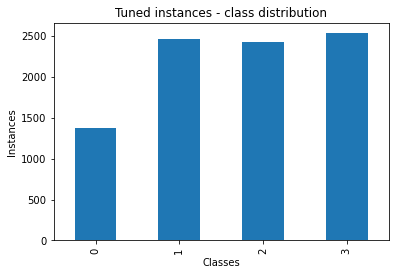

------------------------------------------------Time-domain-based Features Model ------------------------------------------------


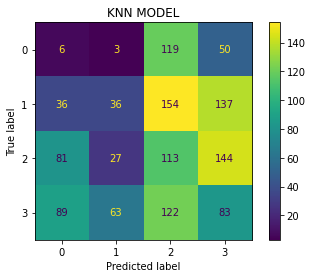

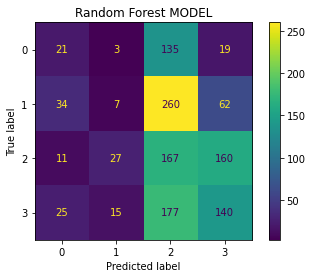


The KNN accuracy is: 0.18844022169437846
The RF accuracy is: 0.26524148851939827

The KNN F1 is: 0.16282323182035438
The RF F1 is: 0.21795219866932924
------------------------------------------------All Time and Frequency Domain Baseline Features Model ------------------------------------------------


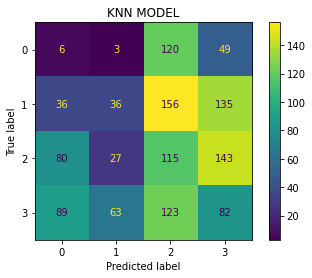

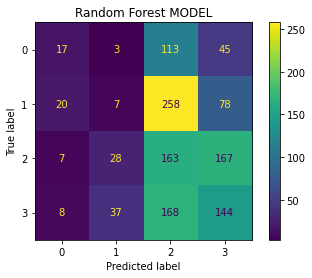


The KNN accuracy is: 0.1892319873317498
The RF accuracy is: 0.2620744259699129

The KNN F1 is: 0.16323749688954697
The RF F1 is: 0.212353790052691
------------------------------------------------My Proposed Features Model ------------------------------------------------


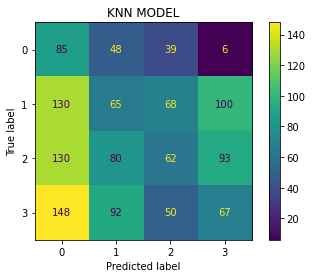

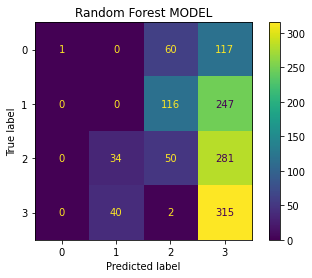


The KNN accuracy is: 0.2209026128266033
The RF accuracy is: 0.28978622327790976

The KNN F1 is: 0.2203468844376985
The RF F1 is: 0.16454178933057828


,Left-0,Left-1,Left-2,Left-3,Left-4,Left-5,Left-6,Left-7,Left-8,Left-9,...,MAX Right,STD Left,STD Right,Skew Left,Skew Right,Med Left,Med Right,Var Left,Var Right,Labels
0,90.753592,90.025702,89.412000,90.495202,90.423115,90.336647,90.534628,90.501261,90.304912,90.299277,...,48.836193,0.355145,0.435989,-0.177893,0.199771,44.826304,47.690409,0.126128,0.190087,0
1,89.899688,89.952707,89.961924,90.418765,90.078198,89.968372,89.973377,89.938209,89.923748,89.902937,...,48.836193,0.328054,0.333602,0.126481,0.574672,44.626577,47.560834,0.107619,0.111290,0
2,90.620436,90.862172,90.518094,90.522255,90.375727,90.282780,90.175811,90.071454,89.966849,89.862239,...,48.270218,0.318420,0.265477,0.265727,0.013638,44.587459,47.507254,0.101391,0.070478,0
3,88.918938,88.836070,88.882565,89.378604,89.976288,88.220448,88.525137,88.899432,89.399148,89.814582,...,48.380898,0.290539,0.318606,0.276576,-0.137056,44.591570,47.601435,0.084413,0.101510,0
4,89.384202,88.374568,88.943260,89.100408,88.632879,89.213377,88.886819,88.681710,89.061931,88.684184,...,48.717941,0.292889,0.318404,0.141425,-0.052907,44.645752,47.808524,0.085784,0.101381,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7534,78.974874,78.631709,78.675407,78.646076,78.518220,78.529623,78.235075,78.457166,78.614208,78.389782,...,40.600769,0.492923,2.923135,0.090040,-0.492946,39.331675,38.978911,0.242973,8.544721,3
7535,78.564533,78.263410,78.299711,78.228459,78.213495,78.181220,78.153634,78.125211,78.096879,78.068544,...,40.600769,0.449067,1.685465,-0.405164,-1.814910,39.696998,39.361499,0.201661,2.840792,3
7536,77.571742,77.741445,78.523619,78.326018,78.428970,78.236296,78.046438,78.373055,79.235065,79.143700,...,40.600769,0.568219,0.394627,-1.953624,0.167256,39.699042,39.533035,0.322873,0.155731,3
7537,79.359533,79.084486,79.584616,80.029658,79.795889,79.946025,80.444527,80.117134,80.067256,80.100944,...,40.662991,0.593940,0.441199,-1.593515,0.367445,39.684631,39.483461,0.352765,0.194657,3


In [13]:
# The pipeline for experiments.

# Encode features into numeric values.
df_numeric_features = encode(df_input=df_raw_features)
df_numeric_test = encode(df_input=df_raw_test)

# Get validated instances.
# df_all_features = validate_instances(df_input=df_numeric_features)
# df_all_features_test = validate_instances(df_input=df_numeric_test)

df_all_features, df_all_features_test = validate_instances(df_input=df_numeric_features)


# Looping and fine-tuning hyper-parameters. <TODO>

# Compare different features.
# Time-domain baseline feature sets.
time_domain_features = [AVE_DM, DIFF_DM, MEAN_LEFT, MEAN_RIGHT, VAR_LEFT, VAR_RIGHT, STD_LEFT, STD_RIGHT, MAX_LEFT, MAX_RIGHT, SKEW_LEFT, SKEW_RIGHT, MED_LEFT, MED_RIGHT]
df_baseline_time_features = select_features(df_input=df_all_features, selected_feature_sets=time_domain_features, dropped_feature_sets=False)
# train_test_models(df_input=df_baseline_time_features, label_string='Time-domain-based Features')

df_baseline_time_features_test = select_features(df_input=df_all_features_test, selected_feature_sets=time_domain_features, dropped_feature_sets=False)
train_test_models(df_input=df_baseline_time_features, df_test=df_baseline_time_features_test, label_string='Time-domain-based Features')

# # Freqeuncy baseline feature sets.
# freq_domain_ipa_features = [IPA_LEFT, IPA_RIGHT]
# df_baseline_freq_features_ipa = select_features(df_input=df_all_features, selected_feature_sets=freq_domain_ipa_features, dropped_feature_sets=False)
# train_test_models(df_input=df_baseline_freq_features_ipa, label_string='Freq-domain-based IPA Features')

# freq_domain_lhipa_features = [LHIPA_LEFT, LHIPA_RIGHT]
# df_baseline_freq_features_lhipa = select_features(df_input=df_all_features, selected_feature_sets=freq_domain_lhipa_features, dropped_feature_sets=False)
# train_test_models(df_input=df_baseline_freq_features_lhipa, label_string='Freq-domain-based LHIPA Features')

# # Only wavelet coefficients features.
# dropped_IPA_LHIPA_AVE_DIFF = [AVE_DM, DIFF_DM, IPA_LEFT, IPA_RIGHT, LHIPA_LEFT, LHIPA_RIGHT]
# df_only_coefs = select_features(df_input=df_all_features, selected_feature_sets=False, dropped_feature_sets=dropped_IPA_LHIPA_AVE_DIFF)
# train_test_models(df_input=df_only_coefs, label_string='Only Wavelet Coefficients Features')

# IPA LHIPA and AVE_DM + DF_DM features.
freq_time_baseline_features = [AVE_DM, DIFF_DM, MEAN_LEFT, MEAN_RIGHT, VAR_LEFT, VAR_RIGHT, STD_LEFT, STD_RIGHT, MAX_LEFT, MAX_RIGHT, SKEW_LEFT, SKEW_RIGHT, MED_LEFT, MED_RIGHT,IPA_LEFT, IPA_RIGHT, LHIPA_LEFT, LHIPA_RIGHT]
df_baselines = select_features(df_input=df_all_features, selected_feature_sets=freq_time_baseline_features, dropped_feature_sets=False)
# train_test_models(df_input=df_baselines, label_string='All Time and Frequency Domain Baseline Features')

df_baselines_test = select_features(df_input=df_all_features_test, selected_feature_sets=freq_time_baseline_features, dropped_feature_sets=False)
train_test_models(df_input=df_baselines, df_test=df_baselines_test, label_string='All Time and Frequency Domain Baseline Features')




# My proposed feature based features.
dropped_IPA_LHIPA_features = [IPA_LEFT, IPA_RIGHT, LHIPA_LEFT, LHIPA_RIGHT]
df_proposed = select_features(df_input=df_all_features, selected_feature_sets=False, dropped_feature_sets=dropped_IPA_LHIPA_features)
# train_test_models(df_input=df_proposed, label_string='My Proposed Features')

df_proposed_test = select_features(df_input=df_all_features_test, selected_feature_sets=False, dropped_feature_sets=dropped_IPA_LHIPA_features)
train_test_models(df_input=df_proposed, df_test=df_proposed_test, label_string='My Proposed Features')


# # All features baseline.
# df_all_baseline = select_features(df_input=df_all_features, selected_feature_sets=False, dropped_feature_sets=False)
# train_test_models(df_input=df_all_baseline, label_string='All Features')

## TODO list

In [14]:
# <TODO: get an arguments stuff>
# def parse_args():
#     parser = argparse.ArgumentParser()
#     parser.add_argument("--path", type=str, default='/content/gdrive/MyDrive/CS5242/project', 
#                         help="path")
#     parser.add_argument('--using_cuda', type=bool, default=True,
#                         help='cuda/cpu')
#     parser.add_argument('--gpu_ids', type=bool, default=[0],
#                         help='cuda/cpu')
#     parser.add_argument('--times', type=int, default=1,
#                         help='loop times of the whole process')
#     parser.add_argument('--sequence_len', type=int, default=1,
#                         help='20/1')
#     parser.add_argument('--train', type=bool, default=True,
#                         help='')
#     parser.add_argument('--predict', type=bool, default=True,
#                         help='')
#     parser.add_argument('--debug_mode', type=bool, default=False,
#                         help='adjust parameters ?')
#     # parser.add_argument('--model', type=str, default='bert',
#     #                     help='support bert/bert_lstm/bert_cnn/word2vec')
#     parser.add_argument('--model', type=str, default='MLP', choices=['bert', 'bert_lstm', 'bert_cnn', 'word2vec', 'MLP'], help='support bert/bert_lstm/bert_cnn/word2vec/MLP')
    
#     parser.add_argument('--language', type=str, default='en',
#                         help='support en')
#     parser.add_argument('--early_stop', type=int, default=60,
#                         help='')
#     parser.add_argument('--features_dim', type=int, default=768,# ?
#                         help='')
#     parser.add_argument('--batch_size', type=int, default=16,
#                         help='')
#     parser.add_argument('--train_rate', type=float, default=0.6,
#                         help='')
#     parser.add_argument('--test_rate', type=float, default=0.2,
#                         help='')
#     parser.add_argument('--num_workers', type=int, default=0,
#                         help='num workers of loading data')
    
#     parser.add_argument('--label', type=str, default='activation',
#                         help='support activation/polarity')
#     parser.add_argument('--num_classes', type=int, default=3,
#                         help='class number')
    
#     parser.add_argument('--train_size', type=str, default='normal',
#                         help='normal')
#     parser.add_argument('--model_save_path', type=str, default='model_save',
#                         help='path to save model.')
#     parser.add_argument('--data_dir', type=str, default='/word2vec.pkl',
#                         help='path to data directory word2vec.pkl/bert_feature.pkl')
#     parser.add_argument('--log_path', type=str, default='/content/gdrive/MyDrive/CS5242/project/log/',
#                     help='path to data directory feature.pkl')
#     return parser.parse_args(args = [])
#
#     args = parse_args()
# def parse_args():
#     parser = argparse.ArgumentParser()
#     parser.add_argument('--max_seq_length', type=int, default = 50,
#                         help='length')
#     parser.add_argument('-f')
#     return parser.parse_args()
# 
#     save_data(args, features, '/word2vec.pkl')
# def save_data(args, features, save_path):
#     path = os.path.abspath(os.path.join(os.getcwd(), ".."))
#     with open(os.path.join(path, "data/" + save_path),'wb') as file_obj:
#         pickle.dump(features,file_obj)
#         print('Save Successful!')